Prerequisite: **"QKD BB84 1 Qubit.ipynb"**
In this Part of QKD Codes I wrote a n qubit quantum circuit for QKD.
it has several steps:


1.   It shows Alice's random circuit
2.   It shows the circuit after bob's turn for act Hadamard and measurment
3.   It Prints "Alice's bits" and "Bob's bits" and "Sifted Key"
4.   It plots the simulation



In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit ipywidgets
!pip install pylatexenc

alice's bases:      [0 0 0 0 1 0 1 1 1 0]
Bob's bases:      [1 0 1 1 1 1 1 1 1 1]


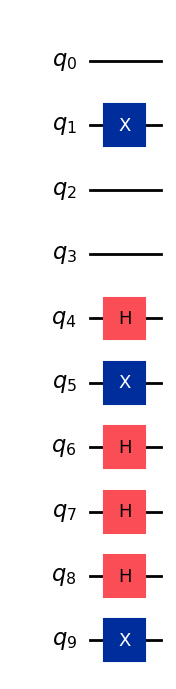

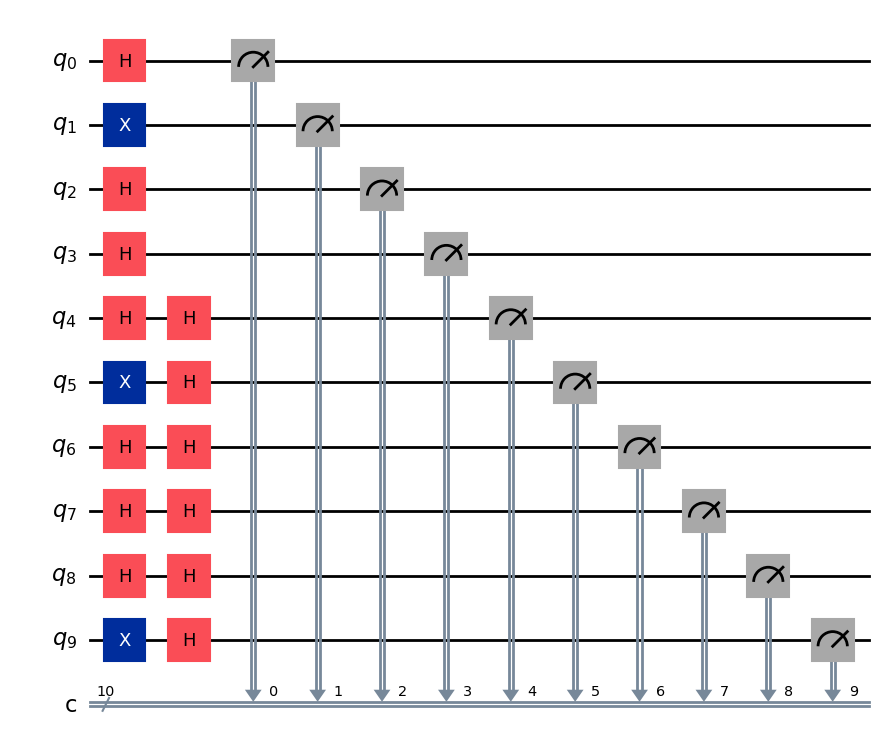

Alice's bits:    [0 1 0 0 0 1 0 0 0 1]
Bob's bits:      [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
Sifted key:      [1, 0, 0, 0, 0]


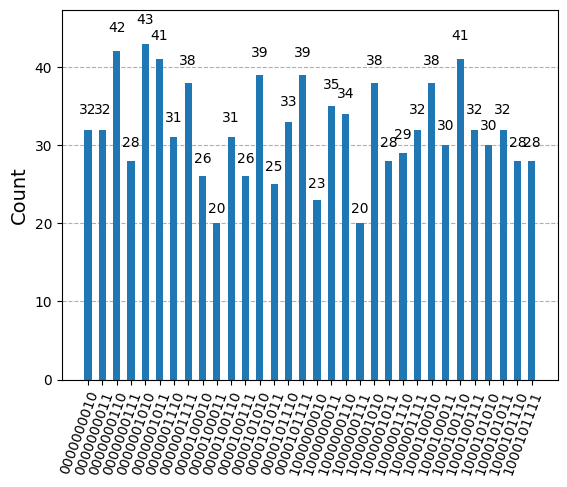

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit_aer import AerSimulator
import numpy as np

# Define the number of qubits
n = 10

# Generate random bits and bases
np.random.seed(42)  # For reproducibility
alice_bits = np.random.randint(2, size=n)
alice_bases = np.random.randint(2, size=n)
bob_bases = np.random.randint(2, size=n)
print("alice's bases:     ", alice_bases)
print("Bob's bases:     ", bob_bases)
# Prepare Alice's quantum circuit
alice_circuit = QuantumCircuit(n)
for i in range(n):
    if alice_bits[i] == 1:
        alice_circuit.x(i)
    if alice_bases[i] == 1:
        alice_circuit.h(i)
# display(alice_circuit.draw('mpl')) **(OPTIONAL)**
# Measure in Bob's bases
for i in range(n):
    if bob_bases[i] == 1:
        alice_circuit.h(i)
alice_circuit_cl = QuantumCircuit(0,n)
alice_circuit_n=alice_circuit.compose(alice_circuit_cl)
for i in range(n):
  alice_circuit_n.measure(i, i)
display(alice_circuit_n.draw('mpl'))
# Transpile the circuit for the simulator
backend = AerSimulator()
compiled_circuit = transpile(alice_circuit_n, backend)

# Execute the circuit
result = backend.run(compiled_circuit).result()
counts = result.get_counts()

# Extract Bob's bits
bob_bits = [int(bit) for bit in list(counts.keys())[0]]

# Key sifting: discard bits where bases don't match
sifted_key = []
for i in range(n):
    if alice_bases[i] == bob_bases[i]:
        sifted_key.append(alice_bits[i])

#Doing a Simulation and Draw a Histogram Plot
from qiskit.quantum_info import DensityMatrix, partial_trace
density_matrix = DensityMatrix.from_instruction(alice_circuit)
from qiskit.visualization import plot_histogram
counts = density_matrix.sample_counts(shots=1024)

print("Alice's bits:   ", alice_bits)
print("Bob's bits:     ", bob_bits)
print("Sifted key:     ", sifted_key)
#Plot Simulation
plot_histogram(counts)